In [1]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

### 윤석열 후보

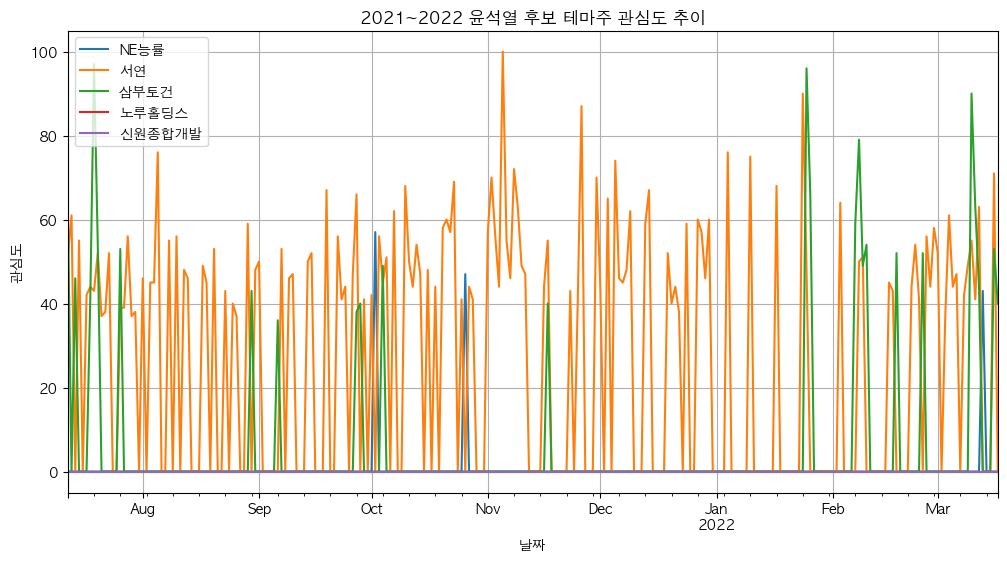

In [ ]:
# 윤석열 후보 테마주

pytrends = TrendReq(hl='ko', tz=540)    # pytrends 객체 생성 (한국 기준)
keywords = ["NE능률", "서연", "삼부토건", "노루홀딩스", "신원종합개발"] # 키워드 생성, 최대 5개

# 데이터 요청
pytrends.build_payload(
    keywords,
    cat=0,
    timeframe='2021-07-12 2022-03-17',  # 날짜 선정 기준: 예비 후보자 등록 ~ 당선 확정 + 1주일
    geo='KR')

df = pytrends.interest_over_time()  # 관심도 데이터 추출

# 시각화
df.drop(columns='isPartial').plot(figsize=(12,6), title='2021~2022 윤석열 후보 테마주 관심도 추이')
plt.xlabel('날짜')
plt.ylabel('관심도')
plt.grid()
plt.show()

# 저장하기
# df = df.drop(columns='isPartial')  # isPartial 컬럼 제거
# df.to_csv("../../data/2022_yoonsukyeol_theme_trends.csv", encoding='utf-8-sig')

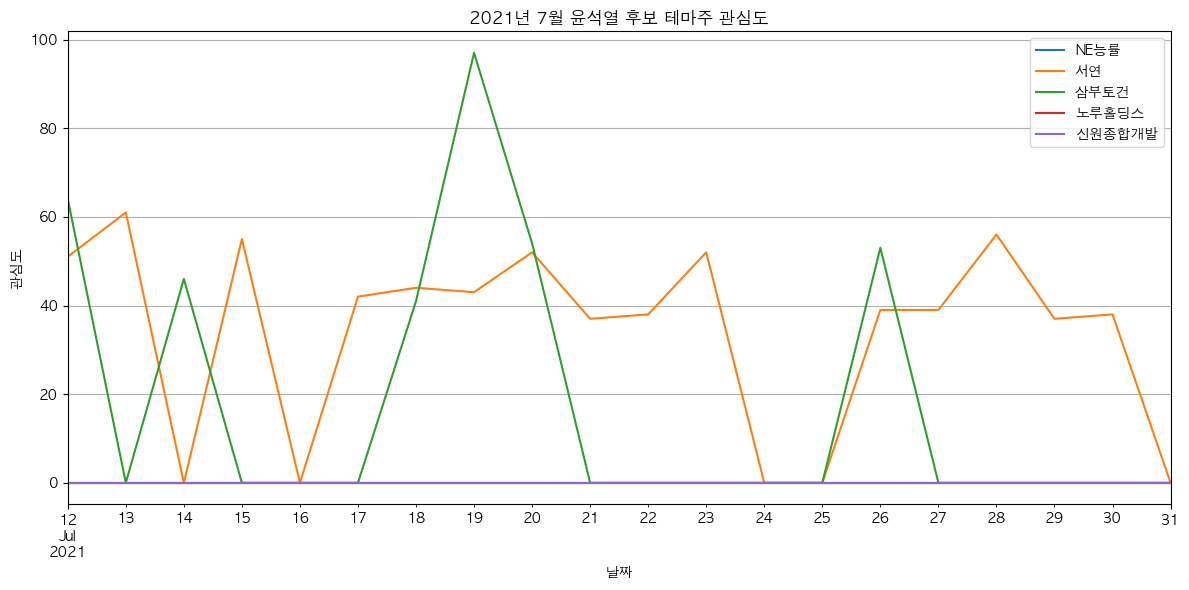

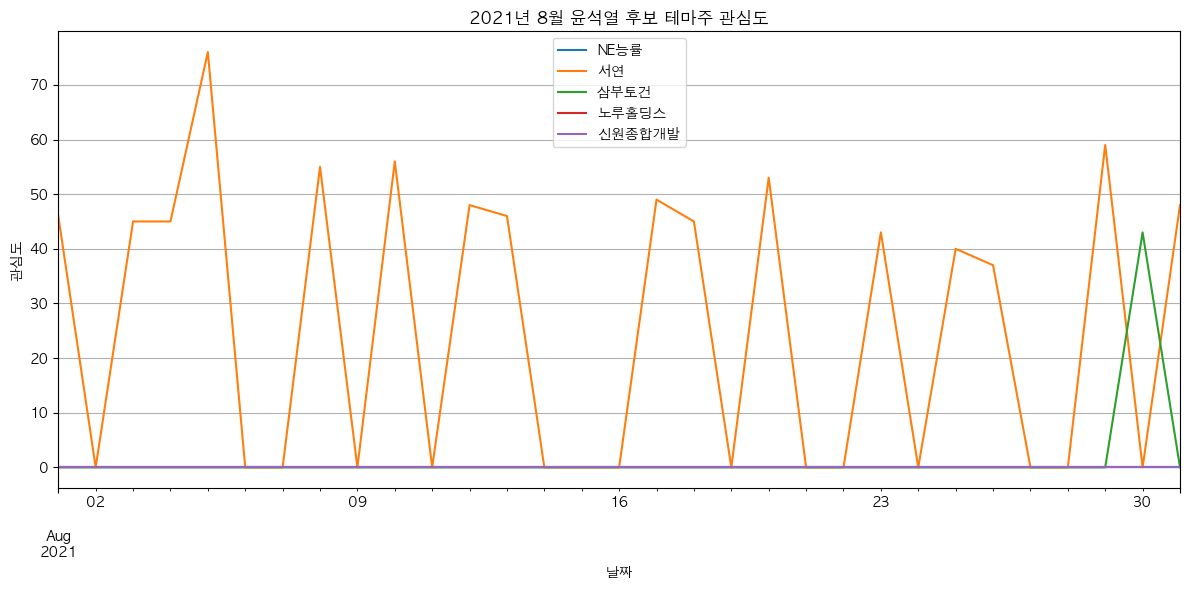

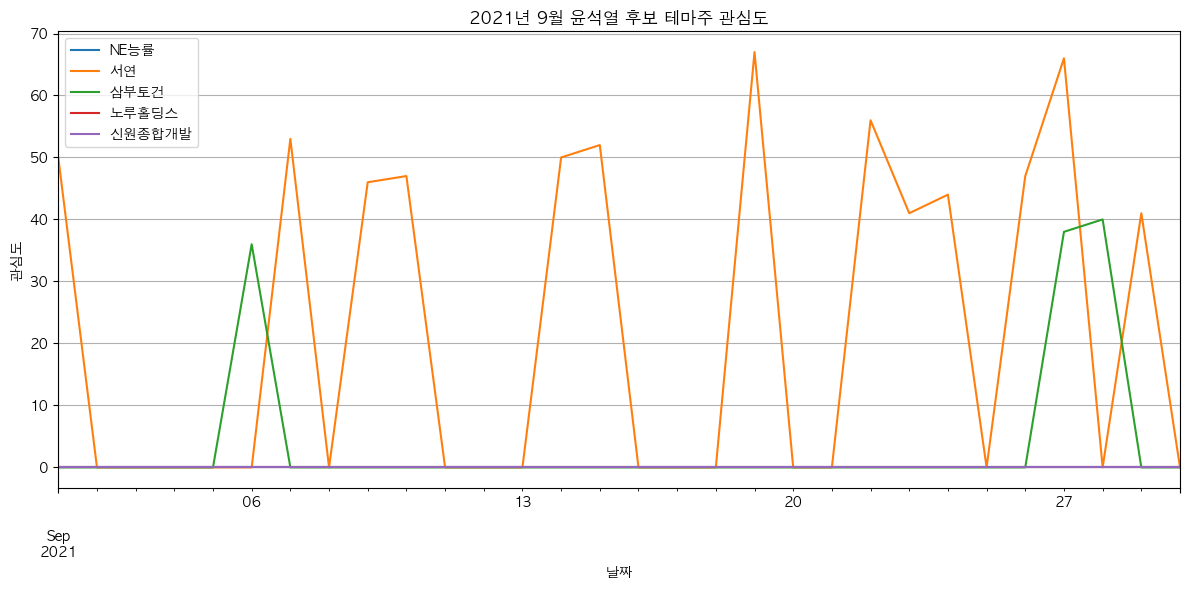

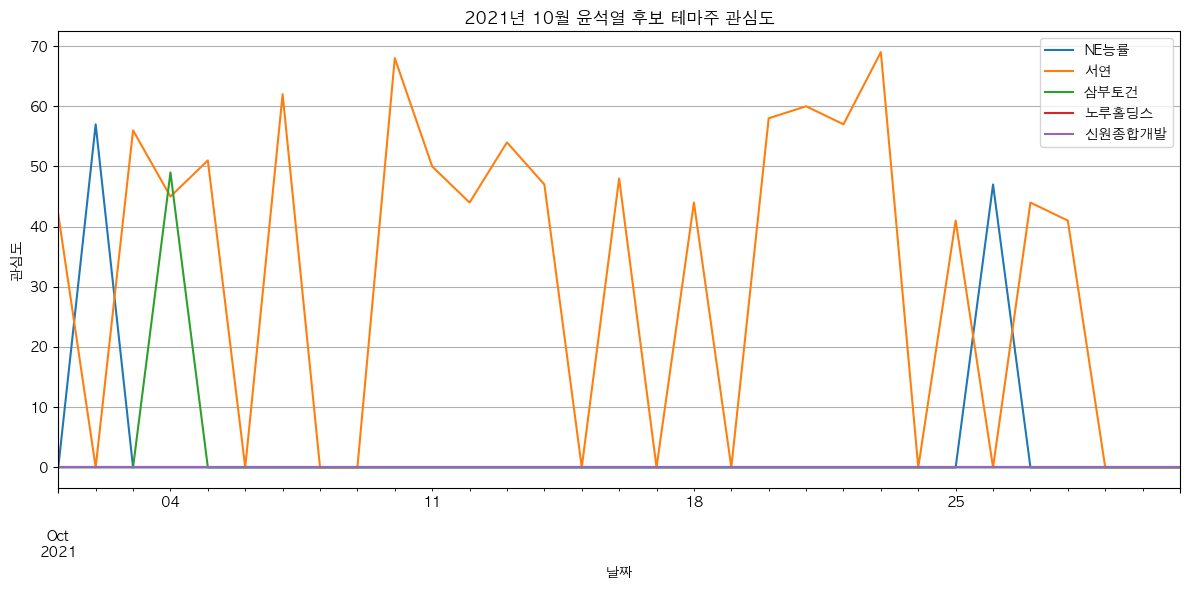

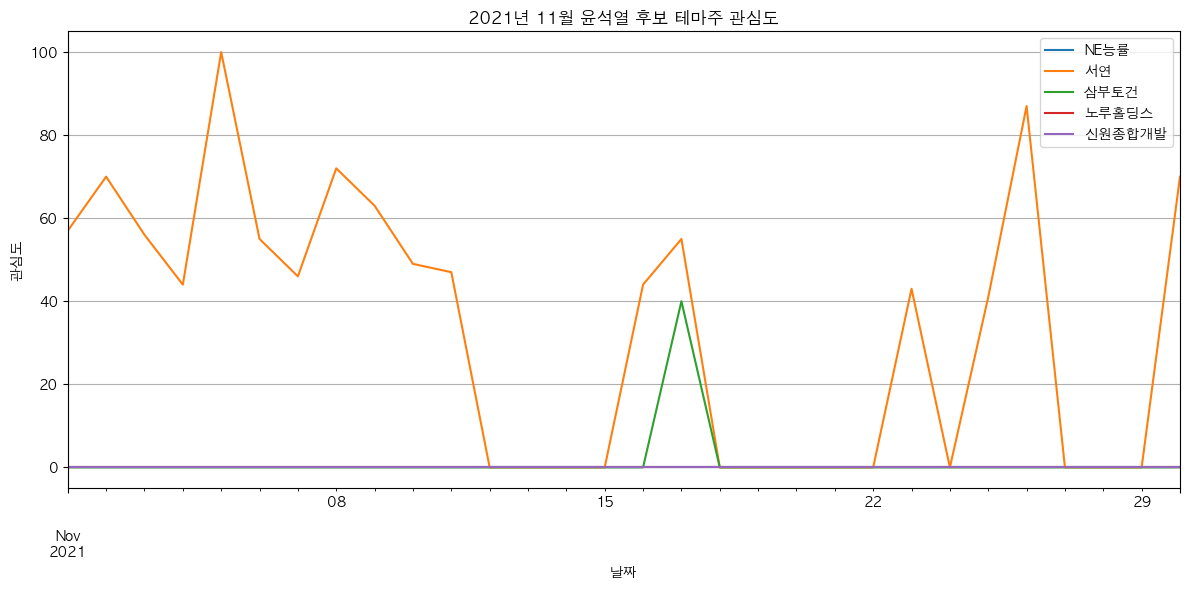

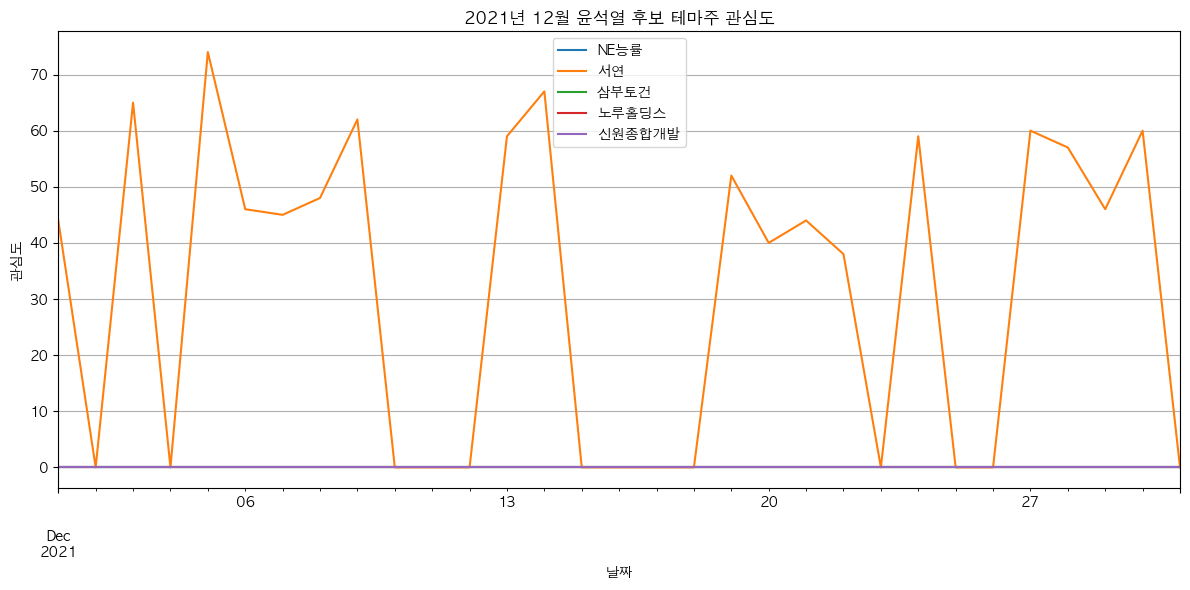

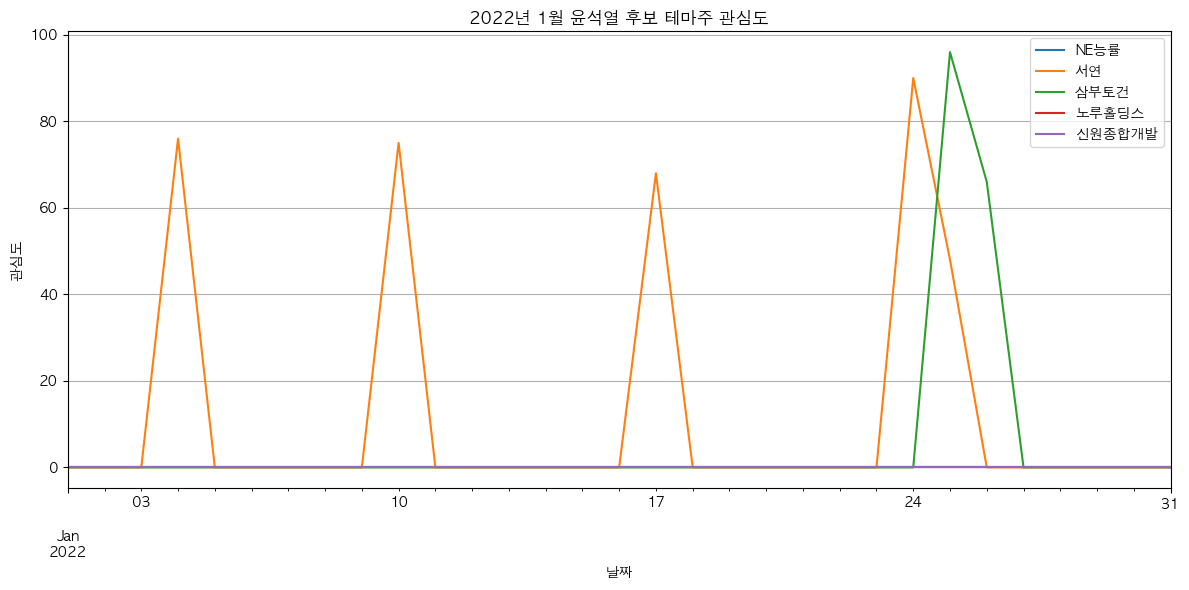

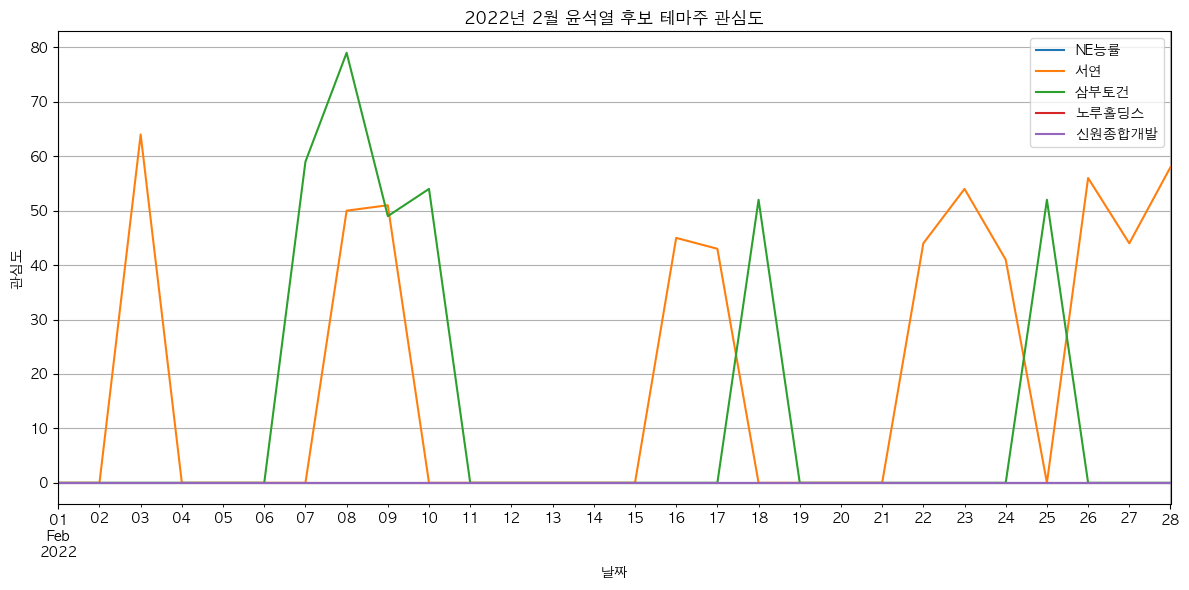

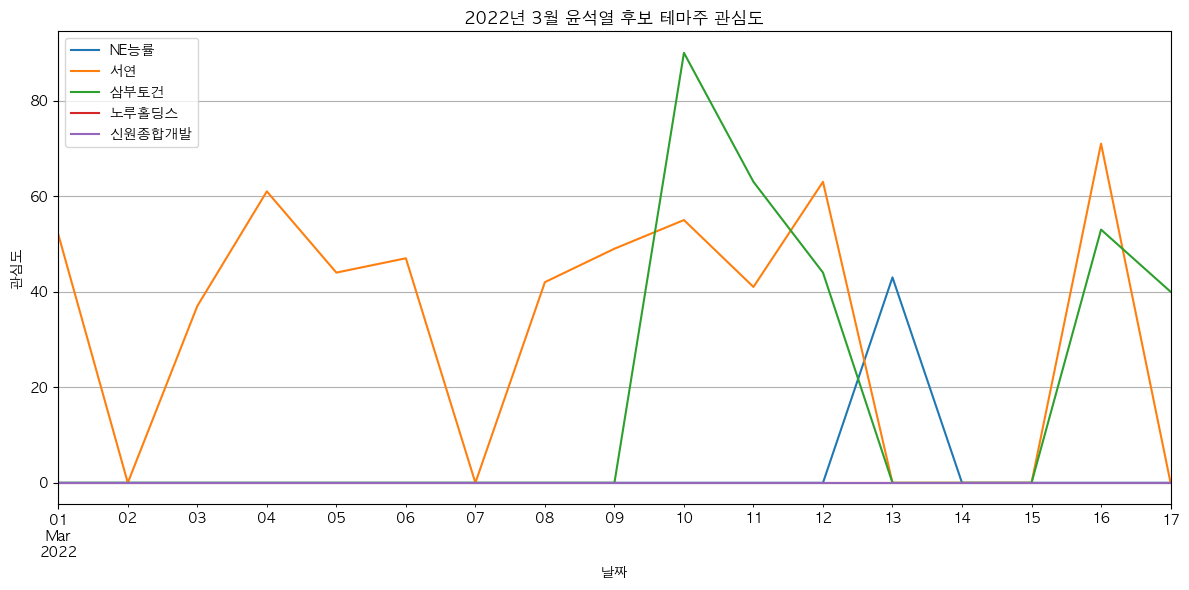

In [3]:
grouped = dict(tuple(df.groupby([df.index.year, df.index.month])))  # 월별로 분리

# 시각화
for (year, month), data in sorted(grouped.items()):
    plt.figure(figsize=(12,6))
    data.plot(ax=plt.gca())
    plt.title(f'{year}년 {month}월 윤석열 후보 테마주 관심도')
    plt.xlabel('날짜')
    plt.ylabel('관심도')
    plt.grid()
    plt.tight_layout()
    plt.show()

### 이재명 후보

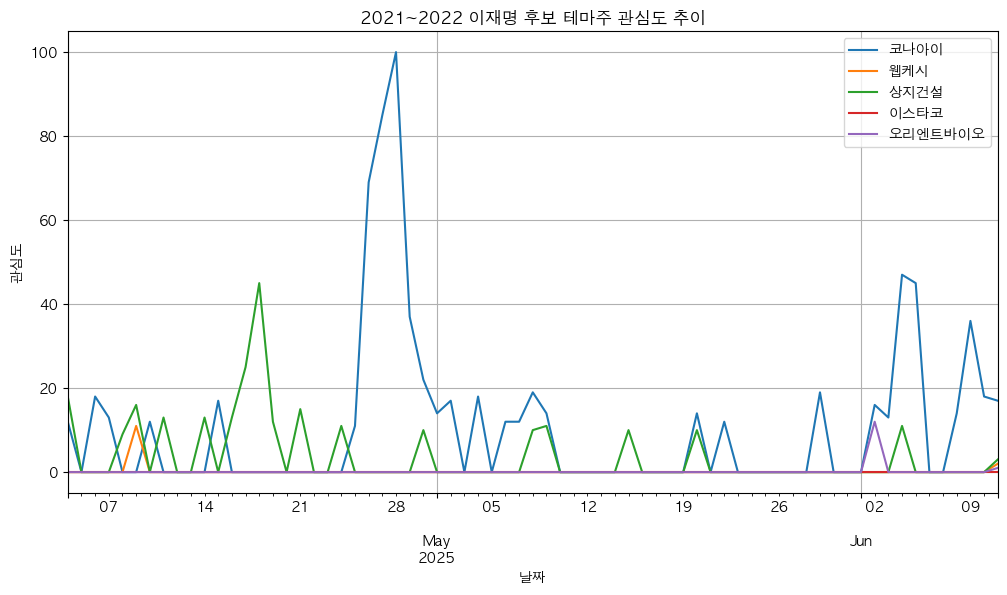

In [ ]:
# 이재명 후보 테마주

pytrends = TrendReq(hl='ko', tz=540)    # pytrends 객체 생성 (한국 기준)
keywords = ["코나아이", "웹케시", "상지건설", "이스타코", "오리엔트바이오"] # 키워드 생성, 최대 5개

# 데이터 요청
pytrends.build_payload(
    keywords,
    cat=0,
    timeframe='2025-04-04 2025-06-11',  # 날짜 선정 기준: 예비 후보자 등록 ~ 당선 확정 + 1주일
    geo='KR')

df = pytrends.interest_over_time()  # 관심도 데이터 추출

# 시각화
df.drop(columns='isPartial').plot(figsize=(12,6), title='2021~2022 이재명 후보 테마주 관심도 추이')
plt.xlabel('날짜')
plt.ylabel('관심도')
plt.grid()
plt.show()

# 저장하기
# df = df.drop(columns='isPartial')  # isPartial 컬럼 제거
# df.to_csv("../../data/2022_leejaemyung_theme_trends.csv", encoding='utf-8-sig')

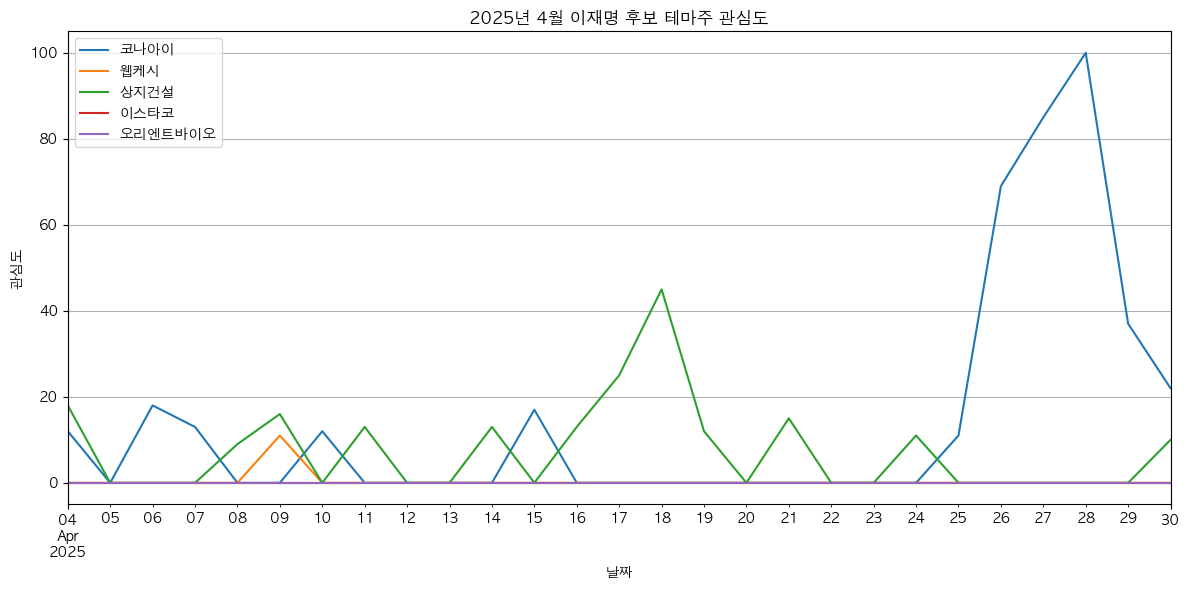

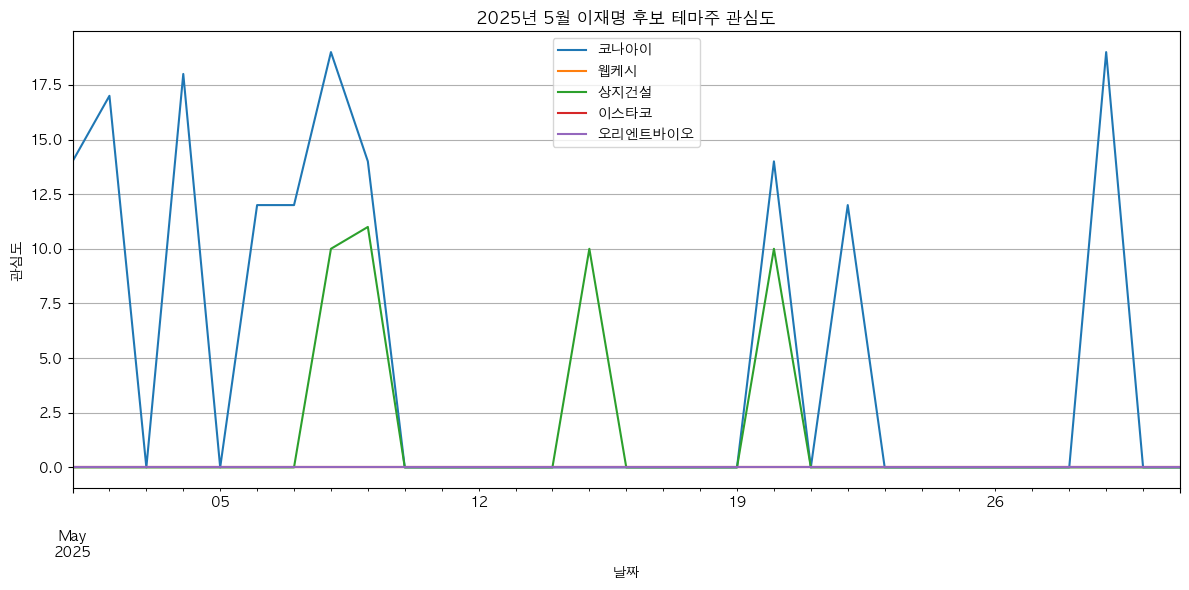

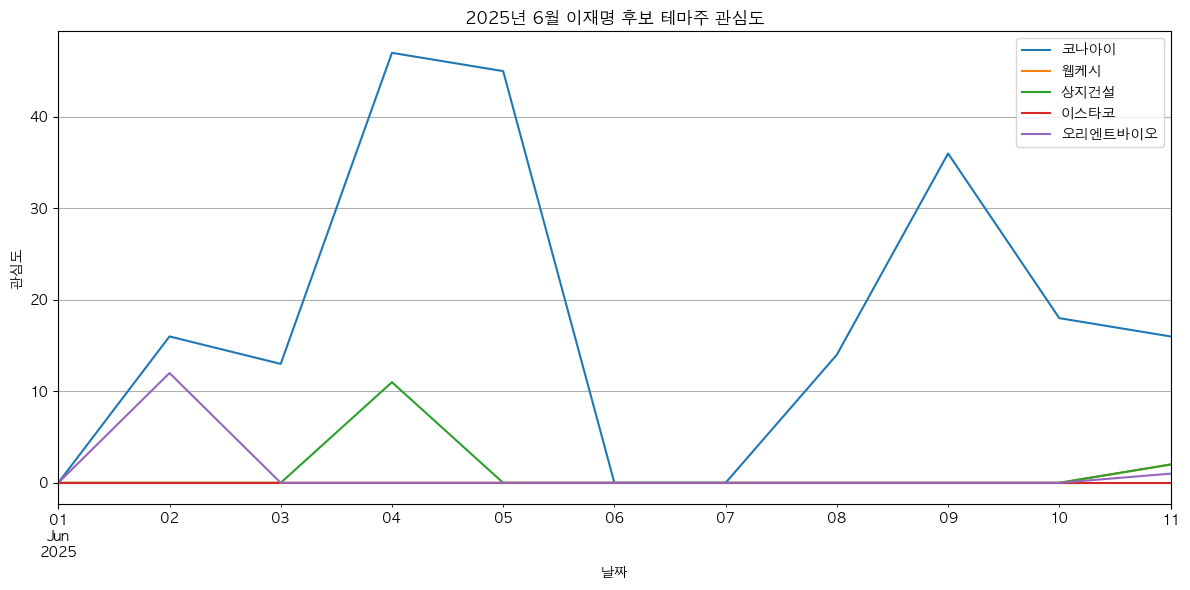

In [19]:
grouped = dict(tuple(df.groupby([df.index.year, df.index.month]))) # 월별로 분리

# 시각화
for (year, month), data in sorted(grouped.items()):
    plt.figure(figsize=(12,6))
    data.plot(ax=plt.gca())
    plt.title(f'{year}년 {month}월 이재명 후보 테마주 관심도')
    plt.xlabel('날짜')
    plt.ylabel('관심도')
    plt.grid()
    plt.tight_layout()
    plt.show()